In [1]:
!pip install mplhep

In [2]:
import uproot

f = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_10.root"
)

In [3]:
tree = f["deepntuplizer/tree"]

In [4]:
# jet_features = tree.arrays(["p_t"], entry_stop=-1)
branches = tree.keys()

In [5]:
branches

['Delta_gen_pt',
 'event_no',
 'gen_pt',
 'isB',
 'isBB',
 'isC',
 'isG',
 'isLeptonicB',
 'isLeptonicB_C',
 'isS',
 'isUD',
 'isUndefined',
 'jet_corr_pt',
 'jet_eta',
 'jet_looseId',
 'jet_no',
 'jet_phi',
 'jet_pt',
 'jet_tightId',
 'npv',
 'ntrueInt',
 'pfBoostedDoubleSecondaryVertexAK8BJetTags',
 'pfCombinedInclusiveSecondaryVertexV2BJetTags',
 'pfCombinedMVAV2BJetTags',
 'pfDeepCSVJetTags_probb',
 'pfDeepCSVJetTags_probbb',
 'pfDeepCSVJetTags_probc',
 'pfDeepCSVJetTags_probcc',
 'pfDeepCSVJetTags_probudsg',
 'pfJetBProbabilityBJetTags',
 'pfJetProbabilityBJetTags',
 'rho',
 'softPFElectronBJetTags',
 'softPFMuonBJetTags',
 'fj_doubleb',
 'fj_eta',
 'fj_gen_eta',
 'fj_gen_pt',
 'fj_isBB',
 'fj_isH',
 'fj_isNonBB',
 'fj_isQCD',
 'fj_isTop',
 'fj_isW',
 'fj_isZ',
 'fj_jetNTracks',
 'fj_label',
 'fj_labelJMAR',
 'fj_labelLegacy',
 'fj_mass',
 'fj_nSV',
 'fj_n_sdsubjets',
 'fj_nbHadrons',
 'fj_ncHadrons',
 'fj_phi',
 'fj_pt',
 'fj_ptDR',
 'fj_relptdiff',
 'fj_sdmass',
 'fj_sdn2',
 'fj

In [6]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Delta_gen_pt         | float                    | AsDtype('>f4')
event_no             | uint32_t                 | AsDtype('>u4')
gen_pt               | float                    | AsDtype('>f4')
isB                  | int32_t                  | AsDtype('>i4')
isBB                 | int32_t                  | AsDtype('>i4')
isC                  | int32_t                  | AsDtype('>i4')
isG                  | int32_t                  | AsDtype('>i4')
isLeptonicB          | int32_t                  | AsDtype('>i4')
isLeptonicB_C        | int32_t                  | AsDtype('>i4')
isS                  | int32_t                  | AsDtype('>i4')
isUD                 | int32_t                  | AsDtype('>i4')
isUndefined          | int32_t                  | AsDtype('>i4')
jet_corr_pt          | float                    | AsDtype(

In [7]:
labels = tree.arrays(
    ["label_QCD_b", "label_QCD_bb", "label_QCD_c", "label_QCD_cc", "label_QCD_others", "label_H_bb", "sample_isQCD"],
    entry_stop=-1,
)

In [8]:
# label QCD: require the sample to be QCD and any of the QCD flavors
label_QCD = labels["sample_isQCD"] * (
    labels["label_QCD_b"]
    + labels["label_QCD_bb"]
    + labels["label_QCD_c"]
    + labels["label_QCD_cc"]
    + labels["label_QCD_others"]
)

# label Hbb
label_Hbb = labels["label_H_bb"]

Let's load a sampling of track, secondary vertex, and jet features.

In [9]:
feature_to_plot = "jet_pt"
jet_features = tree.arrays([feature_to_plot], entry_stop=-1)

In [10]:
jet_features

<Array [{jet_pt: 251}, ..., {jet_pt: 817}] type='199999 * {jet_pt: float32}'>

901.8731493657468


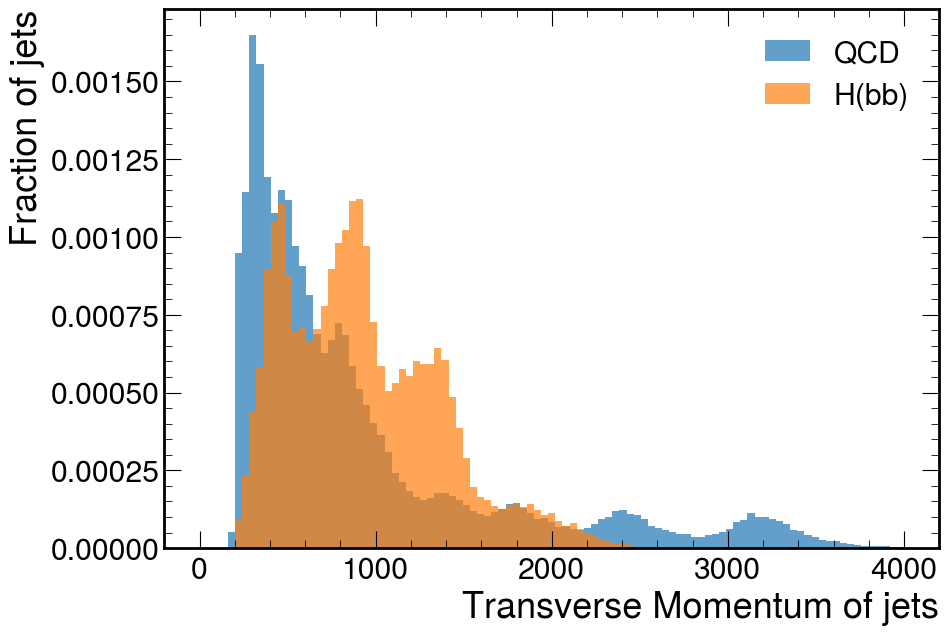

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import awkward as ak

plt.style.use(hep.style.CMS)

# number of tracks
f, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(10, 7))

# npv
axs.hist(jet_features[feature_to_plot], weights=label_QCD, bins=np.linspace(0, 4000, 100), density=True, alpha=0.7, label="QCD")
axs.hist(jet_features[feature_to_plot], weights=label_Hbb, bins=np.linspace(0, 4000, 100), density=True, alpha=0.7, label="H(bb)")
# axs.set_xlim([0, 80])
# axs.set_ylim([0, 0.07])
axs.set_xlabel("Transverse Momentum of jets")
axs.set_ylabel("Fraction of jets")
axs.legend()
# plt.text(6, 0.06, "Low PU\n(20%)", size=18, horizontalalignment="center")
# plt.text(25, 0.06, "High PU\n(80%)", size=18, horizontalalignment="center")
# plt.arrow(15, 0.065, 3, 0, head_length=1, color="gray")
# plt.arrow(15, 0.065, -3, 0, head_length=1, color="gray")
# axs.plot([15, 15], [0, 0.07], color="black")
print(np.mean(jet_features[feature_to_plot]))

# print(len(jet_features[jet_features[feature_to_plot] >= 15]) / len(jet_features))
f.savefig("features_pt.pdf")
plt.show()